# Universidade de Caxias do Sul
## Área de Exatas e Engenharias
## Marcello Fabrizio
### Versão em 03-2022

In [4]:
#Instalação de pacotes
# ! pip3 install sklearn
# ! pip3 install graphviz
# ! pip3 install pydotplus
# ! pip3 install seaborn

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB,CategoricalNB
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [3]:
from google.colab import files
arquivo = files.upload()


ModuleNotFoundError: No module named 'google.colab'

In [6]:
dados = pd.read_csv('tennis.csv')
dados.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


<Figure size 720x432 with 0 Axes>

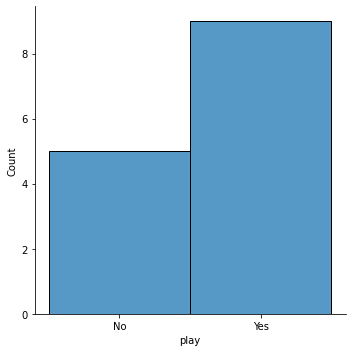

In [7]:
plt.figure(figsize=(10,6))
sb.displot(dados['play'])

In [8]:

print(dados.shape)


(14, 6)


In [9]:
dados

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [10]:
# Classes do problema
print(dados.iloc[:,5])

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: play, dtype: object


In [11]:
dados_copia = dados.copy()

In [12]:
# Atributos do problema
print(dados.iloc[:,1:5])

     outlook  temp humidity    wind
0      Sunny   Hot     High    Weak
1      Sunny   Hot     High  Strong
2   Overcast   Hot     High    Weak
3       Rain  Mild     High    Weak
4       Rain  Cool   Normal    Weak
5       Rain  Cool   Normal  Strong
6   Overcast  Cool   Normal  Strong
7      Sunny  Mild     High    Weak
8      Sunny  Cool   Normal    Weak
9       Rain  Mild   Normal    Weak
10     Sunny  Mild   Normal  Strong
11  Overcast  Mild     High  Strong
12  Overcast   Hot   Normal    Weak
13      Rain  Mild     High  Strong


In [13]:
def index_of_dic(dic, key):
    return dic[key]

def StrList_to_UniqueIndexList(lista):
    group = set(lista)
    
    dic = {}
    i = 0
    for g in group:
        if g not in dic:
            dic[g] = i
            i += 1

    return [index_of_dic(dic, p) for p in lista]


dados['outlook'] = StrList_to_UniqueIndexList(dados['outlook'])
dados['temp'] = StrList_to_UniqueIndexList(dados['temp'])
dados['humidity'] = StrList_to_UniqueIndexList(dados['humidity'])
dados['wind'] = StrList_to_UniqueIndexList(dados['wind'])
dados['play'] = StrList_to_UniqueIndexList(dados['play'])




display(dados_copia.head(5))
display(dados.head(5))

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


,day,outlook,temp,humidity,wind,play
0,D1,1,1,1,1,1
1,D2,1,1,1,0,1
2,D3,0,1,1,1,0
3,D4,2,0,1,1,0
4,D5,2,2,0,1,0


In [14]:
# Remove a coluna de número do dia
dados = dados.drop(['day'],axis=1)

In [15]:
X= dados.iloc[:,0:4]
print(X)

    outlook  temp  humidity  wind
0         1     1         1     1
1         1     1         1     0
2         0     1         1     1
3         2     0         1     1
4         2     2         0     1
5         2     2         0     0
6         0     2         0     0
7         1     0         1     1
8         1     2         0     1
9         2     0         0     1
10        1     0         0     0
11        0     0         1     0
12        0     1         0     1
13        2     0         1     0


In [16]:
y=dados.iloc[:,4]
print(y)

0     1
1     1
2     0
3     0
4     0
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    1
Name: play, dtype: int64


In [17]:
dados

,outlook,temp,humidity,wind,play
0,1,1,1,1,1
1,1,1,1,0,1
2,0,1,1,1,0
3,2,0,1,1,0
4,2,2,0,1,0
5,2,2,0,0,1
6,0,2,0,0,0
7,1,0,1,1,1
8,1,2,0,1,0
9,2,0,0,1,0


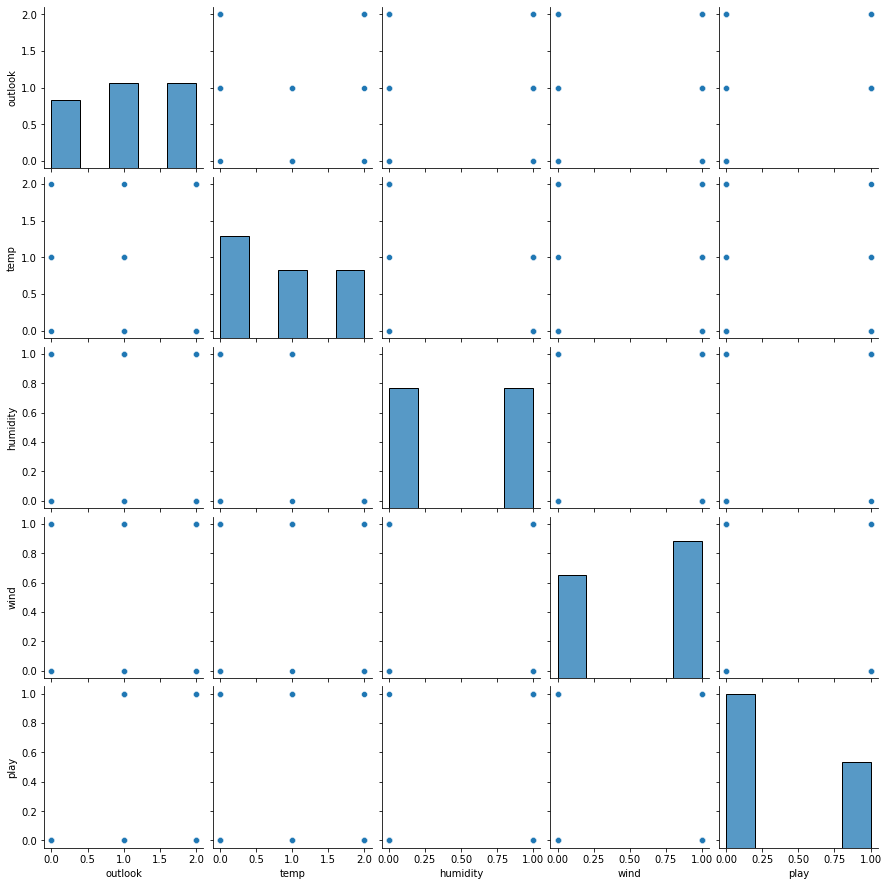

In [18]:
# visualize graficamente os valores dos atributos combinados em pares

import seaborn as sb

sb.pairplot(dados)

<AxesSubplot:xlabel='play', ylabel='wind'>

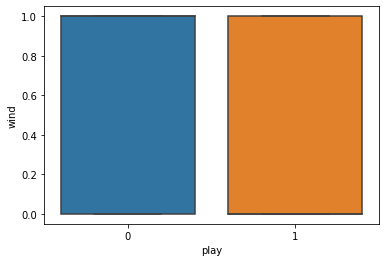

In [19]:
sb.boxplot(x='play',y='wind',data=dados)

<AxesSubplot:xlabel='play', ylabel='humidity'>

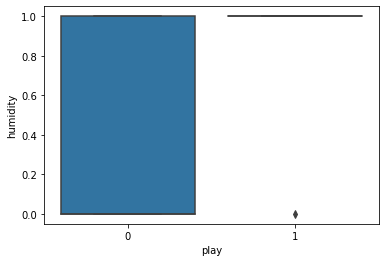

In [20]:
sb.boxplot(x='play',y='humidity',data=dados)

<AxesSubplot:xlabel='play', ylabel='temp'>

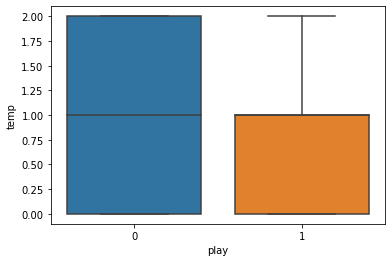

In [21]:
sb.boxplot(x='play',y='temp',data=dados)


# Início do treinamento usando modelo Gaussiano


In [22]:
#Cria um classificador Gaussiano 
gnb = GaussianNB()

In [23]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
predictions = cross_val_predict(gnb,X,y,cv=5)
#Calcula acurácia do treino
accuracy_score(y,predictions)*100

64.28571428571429

# Resultado descritivo

In [25]:

print(confusion_matrix(y,predictions))  
print(classification_report(y,predictions,zero_division=0)) 

[[7 2]
 [3 2]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.50      0.40      0.44         5

    accuracy                           0.64        14
   macro avg       0.60      0.59      0.59        14
weighted avg       0.63      0.64      0.63        14



# Resultado Visual

<AxesSubplot:>

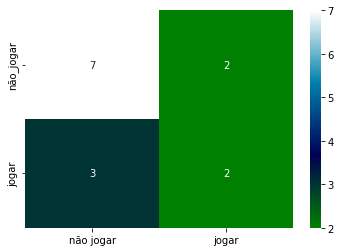

In [26]:
import seaborn as sns
cf = confusion_matrix(y,predictions)
lbl1=['não jogar', 'jogar']
lbl2 = ['não_jogar', 'jogar']
sns.heatmap(cf,annot=True,cmap="ocean", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

In [27]:
#Acurácia prevista do dataset

print(predictions)
print(y)
print("Acurácia:",metrics.accuracy_score(y, predictions))

[1 1 0 1 0 0 0 0 0 0 1 0 0 0]
0     1
1     1
2     0
3     0
4     0
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    1
Name: play, dtype: int64
Acurácia: 0.6428571428571429


In [28]:
mean_absolute_error(y,predictions)

0.35714285714285715

In [29]:
mean_squared_error(y,predictions)

0.35714285714285715

# Início do treinamento usando modelo de Bernoulli

In [30]:
gnbB = BernoulliNB()
predictionsB = cross_val_predict(gnbB,X,y,cv=5)
#Calcula acurácia do treino
accuracy_score(y,predictionsB)*100


57.14285714285714

In [31]:
print(confusion_matrix(y,predictionsB))  
print(classification_report(y,predictionsB,zero_division=0)) 

[[6 3]
 [3 2]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.40      0.40      0.40         5

    accuracy                           0.57        14
   macro avg       0.53      0.53      0.53        14
weighted avg       0.57      0.57      0.57        14



<AxesSubplot:>

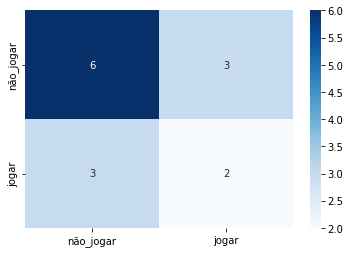

In [32]:
cfB = confusion_matrix(y,predictionsB)
lbl1=['não_jogar', 'jogar']
lbl2 = ['não_jogar', 'jogar']
sns.heatmap(cfB,annot=True,cmap="Blues", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

In [33]:
mean_absolute_error(y,predictionsB)

0.42857142857142855

In [34]:
mean_squared_error(y,predictionsB)

0.42857142857142855


# Início do treinamento usando modelo Multinominal

In [35]:
gnbM = MultinomialNB()
predictionsM = cross_val_predict(gnbM,X,y,cv=5)
#Calcula acurácia do treino
accuracy_score(y,predictionsM)*100

50.0

In [36]:
print(confusion_matrix(y,predictionsM))  
print(classification_report(y,predictionsM,zero_division=0))

[[7 2]
 [5 0]]
              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.00      0.00      0.00         5

    accuracy                           0.50        14
   macro avg       0.29      0.39      0.33        14
weighted avg       0.38      0.50      0.43        14



<AxesSubplot:>

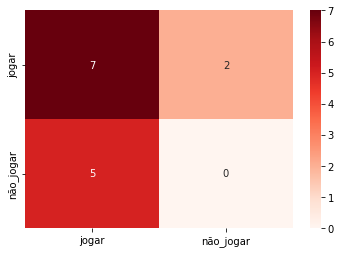

In [37]:
cfM = confusion_matrix(y,predictionsM)
lbl1=['jogar', 'não_jogar']
lbl2 = ['jogar', 'não_jogar']
sns.heatmap(cfM,annot=True,cmap="Reds", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

#  Início do treinamento usando modelo Categórico

In [38]:
gnbC = CategoricalNB()
predictionsC = cross_val_predict(gnbC,X,y,cv=5)
#Calcula acurácia do treino
accuracy_score(y,predictionsC)*100

57.14285714285714

In [39]:
print(confusion_matrix(y,predictionsC))  
print(classification_report(y,predictionsC,zero_division=0))

[[6 3]
 [3 2]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.40      0.40      0.40         5

    accuracy                           0.57        14
   macro avg       0.53      0.53      0.53        14
weighted avg       0.57      0.57      0.57        14



<AxesSubplot:>

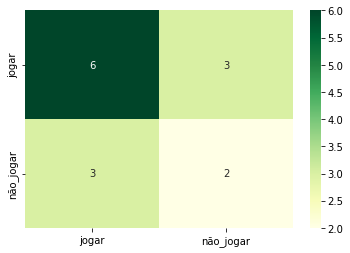

In [40]:

cfC = confusion_matrix(y,predictionsC)
lbl1=['jogar', 'não_jogar']
lbl2 = ['jogar', 'não_jogar']
sns.heatmap(cfC,annot=True, cmap="YlGn", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

# Balanceamento de Classes
## Exemplos como métodos Smote, AdaSyn

In [41]:
X.shape

(14, 4)

In [42]:
y.shape

(14,)

<Figure size 432x144 with 0 Axes>

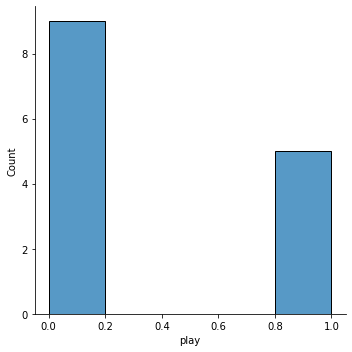

In [43]:
plt.figure(figsize=(6,2))
sb.displot(dados['play'])

# Exemplo SMOTE
## Balanceamento do dataset Tennis

In [44]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=73, k_neighbors = 4)
X_novo, y_novo = sm.fit_resample(X, y)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
print('Depois do processo de OverSampling: {}'.format(X_novo.shape))
print('Depois do processo de OverSampling: {} \n'.format(y_novo.shape))
  
print("Contagem depois do OverSampling - classe '1': {}".format(sum(y_novo == 1)))
print("Contagem depois do OverSampling - classe '0': {}".format(sum(y_novo == 0)))

Depois do processo de OverSampling: (18, 4)
Depois do processo de OverSampling: (18,) 

Contagem depois do OverSampling - classe '1': 9
Contagem depois do OverSampling - classe '0': 9


In [ ]:
X_novo.shape

(18, 4)

In [ ]:
y_novo.shape

(18,)

<Figure size 432x144 with 0 Axes>

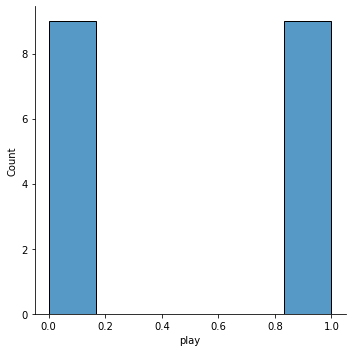

In [ ]:
plt.figure(figsize=(6,2))
sb.displot(y_novo)

# Exemplo ADASYN 

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(n_neighbors = 4)
X_new, y_new = ada.fit_resample(X, y)

In [ ]:
print('Depois do processo de OverSampling: {}'.format(X_new.shape))
print('Depois do processo de OverSampling: {} \n'.format(y_new.shape))
  
print("Contagem depois do OverSampling - classe '1': {}".format(sum(y_new == 1)))
print("Contagem depois do OverSampling - classe '0': {}".format(sum(y_new == 0)))

Depois do processo de OverSampling: (19, 4)
Depois do processo de OverSampling: (19,) 

Contagem depois do OverSampling - classe '1': 10
Contagem depois do OverSampling - classe '0': 9
